# What are the most optimal skills to learn?

Here, a skill is deemed "optimal" if is highly requested while being associated to a large median yearly salary.

## Data loading

In [148]:
import ast 
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

# Load data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Drop duplicates
df = df.drop_duplicates()

# Convert date to datetime
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Convert df['job_skills'] from a string to a list of strings
convert_skills = lambda x: ast.literal_eval(x) if pd.notna(x) else x
df['job_skills'] = df['job_skills'].apply(convert_skills)

## Most optimal skills for specific data roles

### Data analysts

In [199]:
# Isolate data-analyst jobs that have non-null salary_year_avg values
job_title = 'Data Analyst'
df_relevant = df[df['job_title_short'] == job_title].dropna(subset='salary_year_avg').copy()

# Number of jobs
n_jobs = len(df_relevant)

# Explode job_skills
df_skills = df_relevant.explode('job_skills')

# Group by skills and compute median yearly salary
df_skills = df_skills.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
df_skills = df_skills.rename(columns={'count': 'skill_count',
                                      'median': 'median_salary'})

# Sort by descending count
df_skills = df_skills.sort_values('skill_count', ascending=False)

# Compute likelihood
df_skills['skill_likelihood'] = 100*df_skills['skill_count']/n_jobs

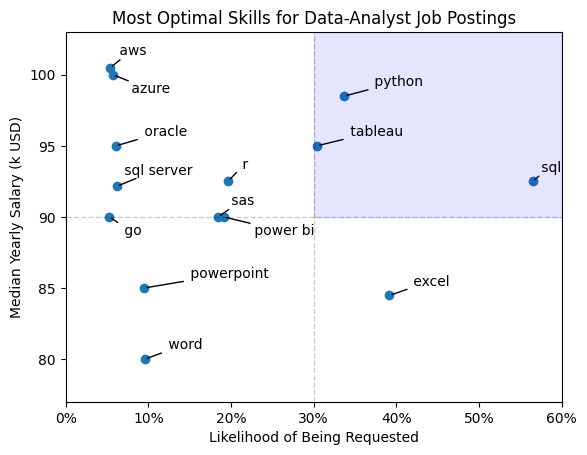

In [200]:
# Filter out skills that are below a certain skill_likelihood
likelihood_threshold = 5  # [%]
df_skills_most_requested = df_skills[df_skills['skill_likelihood']
                                     > likelihood_threshold]

# Plot
job_title_plot = job_title.replace(' ', '-')

plt.scatter(df_skills_most_requested['skill_likelihood'],
            df_skills_most_requested['median_salary'])
plt.title(f'Most Optimal Skills for {job_title_plot} Job Postings')
plt.xlabel(f'Likelihood of Being Requested')
plt.ylabel('Median Yearly Salary (k USD)')

plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{int(y/1000)}'))

plt.xlim([0, 60])
plt.ylim([77000, 103000])

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_skills_most_requested.index):
    texts.append(plt.text(df_skills_most_requested['skill_likelihood'].iloc[i],
                          df_skills_most_requested['median_salary'].iloc[i],
                          " " + txt))

# Adjust text to avoid overlap and add linking lines
adjust_text(texts, expand=(2, 2), arrowprops=dict(arrowstyle='-', color='black'))

# Draw quadrants (to highlight most optimal skills)
x_sep = 30
y_sep = 90000
plt.axhline(y = y_sep, color='k', ls='--', lw=1, alpha=0.2)
plt.axvline(x = x_sep, color='k', ls='--', lw=1, alpha=0.2)
plt.fill_between(x=[x_sep, plt.xlim()[1]],
                 y1=[y_sep, y_sep],
                 y2=[plt.ylim()[1], plt.ylim()[1]],
                 color = 'b',
                 alpha=0.1)

plt.show()

Ad-hoc quadrants were drawn to highlight the skills that appear to be most optimal (in the top-right quadrant).

Breakdown:
- The fundamental skills `python`, `sql` and `tableau` are the ones associated with a high demand and a high median yearly salary (and are therefore deemed "optimal").
- `aws` and `azure` have the highest median yearly salaries while having non-negligible demand.
- `excel` has a high demand but is in the lower range of median yearly salaries.
- `word` has the lowest demand and median yearly salary.

### Data scientists

We redo the same process as above, but for data-scientist roles.

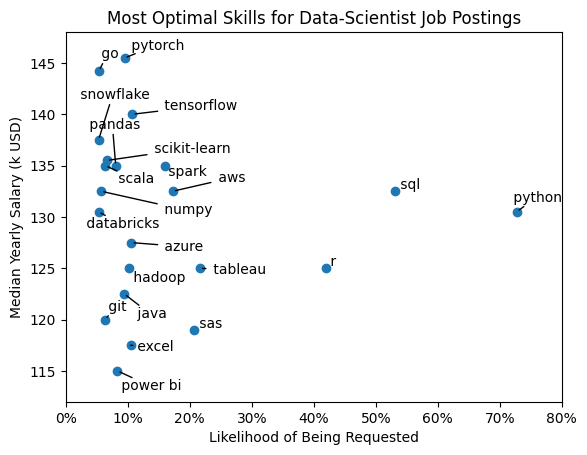

In [202]:
# Isolate data-analyst jobs that have non-null salary_year_avg values
job_title = 'Data Scientist'
df_relevant = df[df['job_title_short'] == job_title].dropna(subset='salary_year_avg').copy()

# Number of jobs
n_jobs = len(df_relevant)

# Explode job_skills
df_skills = df_relevant.explode('job_skills')

# Group by skills and compute median yearly salary
df_skills = df_skills.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
df_skills = df_skills.rename(columns={'count': 'skill_count',
                                      'median': 'median_salary'})

# Sort by descending count
df_skills = df_skills.sort_values('skill_count', ascending=False)

# Compute likelihood
df_skills['skill_likelihood'] = 100*df_skills['skill_count']/n_jobs

# Filter out skills that are below a certain skill_likelihood
likelihood_threshold = 5  # [%]
df_skills_most_requested = df_skills[df_skills['skill_likelihood']
                                     > likelihood_threshold]

# Plot
job_title_plot = job_title.replace(' ', '-')

plt.scatter(df_skills_most_requested['skill_likelihood'],
            df_skills_most_requested['median_salary'])
plt.title(f'Most Optimal Skills for {job_title_plot} Job Postings')
plt.xlabel(f'Likelihood of Being Requested')
plt.ylabel('Median Yearly Salary (k USD)')

plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{int(y/1000)}'))

plt.xlim([0, 80])
plt.ylim([112000, 148000])

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_skills_most_requested.index):
    texts.append(plt.text(df_skills_most_requested['skill_likelihood'].iloc[i],
                          df_skills_most_requested['median_salary'].iloc[i],
                          " " + txt))

# Adjust text to avoid overlap and add linking lines
adjust_text(texts, expand=(1, 2), arrowprops=dict(arrowstyle='-', color='black'))

plt.show()

**Breakdown:**
- The skill distribution for data scientists is quite different compared to the skill distribution for data analysts, as there are no real "optimal" skill here.
- `sql`, `python` and `r` are clear outliers in terms of skill demand, but are associated with average median yearly salaries.
- A large collection of skills gathers at low skill demand, with:
    - classical skills (_e.g._, `power bi`, `excel`, `git`) being in the low-salary range.
    - specialized skills such as machine-learning toolboxes (`scikit-learn`, `tensorflow` and `pytorch`) being in the high-salary range.

This skill distribution reflects the higher technical specialization that data-scientist roles tend to have compared to data-analyst ones.